In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

#link of dataset
#https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [2]:
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
data.shape

(2111, 17)

In [4]:
data.columns=['Gender', 'Age', 'Height', 'Weight', 'Family_hist_owerweight',
       'eat__high_cal', 'eating_vegatable_in_meal', 'meal_number', 'eating_between_meal',
       'Smoke', 'H2OL', 'Monitör_cal', 'Physical_activity', 'usetime_tech',
       'Alcohol', 'Transportation', 'Obesity_level']
data

,Gender,Age,Height,Weight,Family_hist_owerweight,eat__high_cal,eating_vegatable_in_meal,meal_number,eating_between_meal,Smoke,H2OL,Monitör_cal,Physical_activity,usetime_tech,Alcohol,Transportation,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
data.nunique()  # deciding to implement one-hot-encoding or label-encoding or dummies

Gender                         2
Age                         1402
Height                      1574
Weight                      1525
Family_hist_owerweight         2
eat__high_cal                  2
eating_vegatable_in_meal     810
meal_number                  635
eating_between_meal            4
Smoke                          2
H2OL                        1268
Monitör_cal                    2
Physical_activity           1190
usetime_tech                1129
Alcohol                        4
Transportation                 5
Obesity_level                  7
dtype: int64

In [6]:
data.describe()

,Age,Height,Weight,eating_vegatable_in_meal,meal_number,H2OL,Physical_activity,usetime_tech
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
data.info() # there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    2111 non-null   object 
 1   Age                       2111 non-null   float64
 2   Height                    2111 non-null   float64
 3   Weight                    2111 non-null   float64
 4   Family_hist_owerweight    2111 non-null   object 
 5   eat__high_cal             2111 non-null   object 
 6   eating_vegatable_in_meal  2111 non-null   float64
 7   meal_number               2111 non-null   float64
 8   eating_between_meal       2111 non-null   object 
 9   Smoke                     2111 non-null   object 
 10  H2OL                      2111 non-null   float64
 11  Monitör_cal               2111 non-null   object 
 12  Physical_activity         2111 non-null   float64
 13  usetime_tech              2111 non-null   float64
 14  Alcohol 

C:\Users\PC\AppData\Local\Temp\ipykernel_13692\1454112959.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()


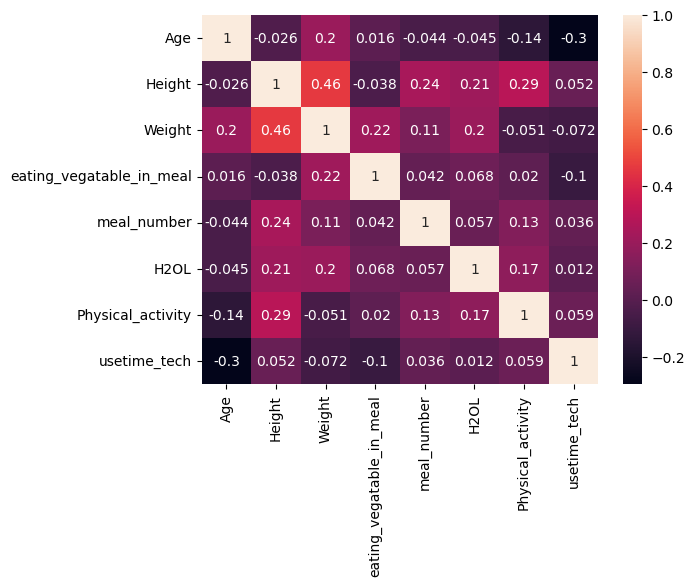

In [8]:
#correlations
sns.heatmap(data.corr()
            ,annot=True) #correlation heatmap 
plt.show()

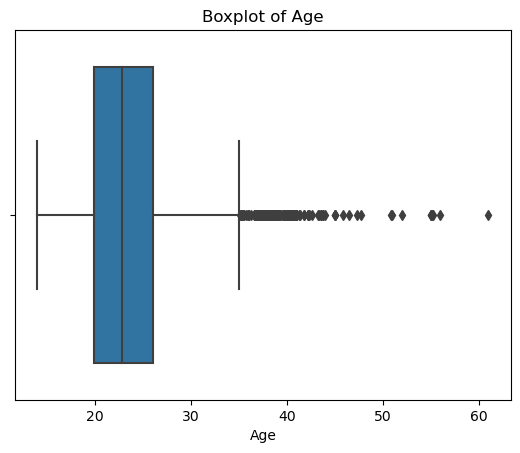

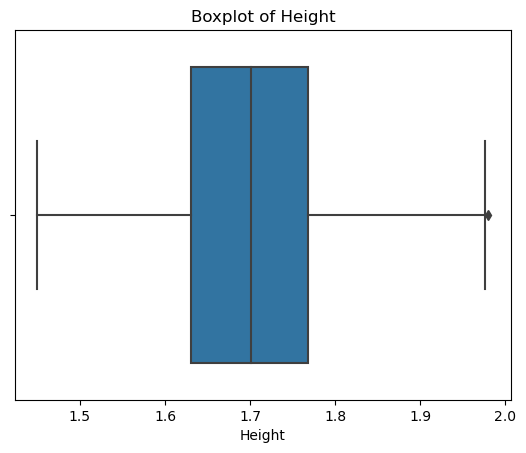

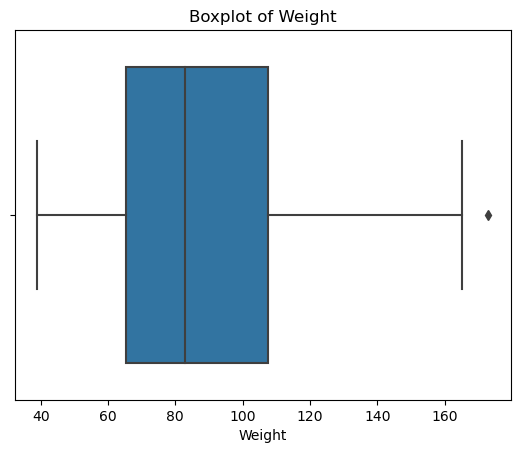

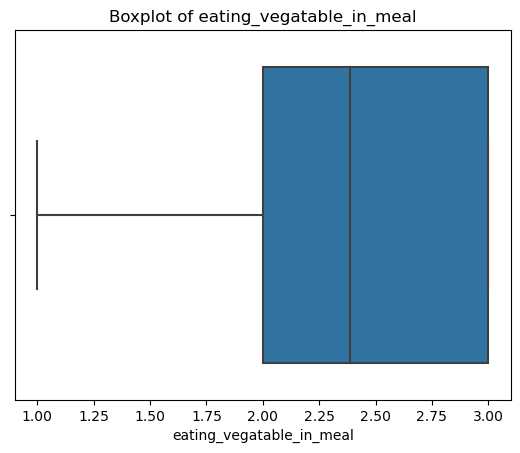

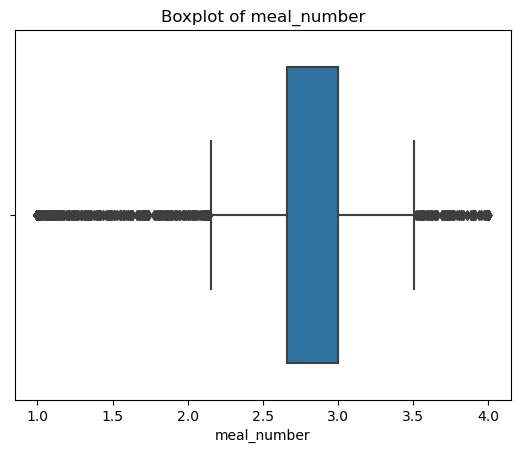

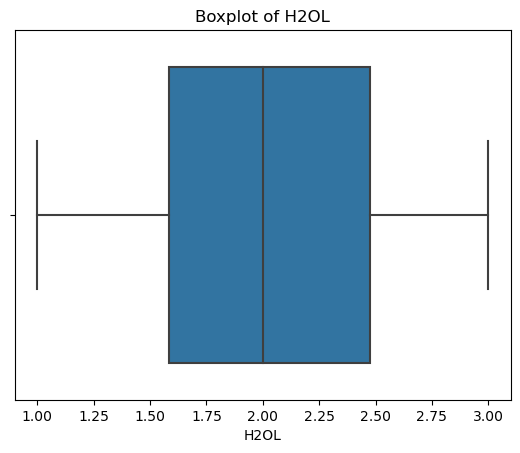

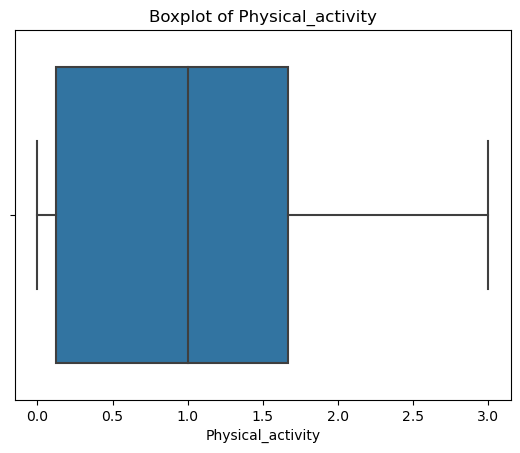

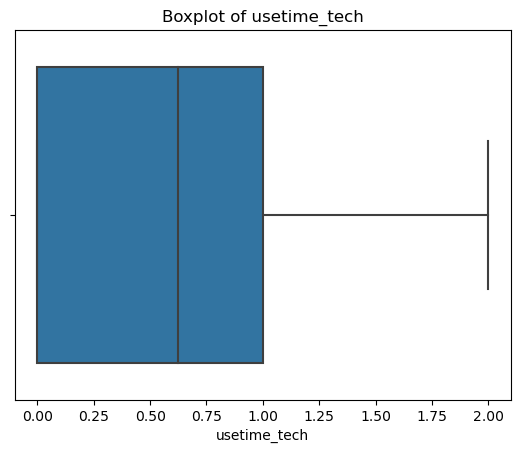

In [9]:
columns=['Age','Height','Weight','eating_vegatable_in_meal','meal_number','H2OL','Physical_activity','usetime_tech']
for c in columns:
    sns.boxplot(data=data,x=c)
    plt.title(f"Boxplot of {c}")
    plt.show()
   

In [10]:
data

,Gender,Age,Height,Weight,Family_hist_owerweight,eat__high_cal,eating_vegatable_in_meal,meal_number,eating_between_meal,Smoke,H2OL,Monitör_cal,Physical_activity,usetime_tech,Alcohol,Transportation,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


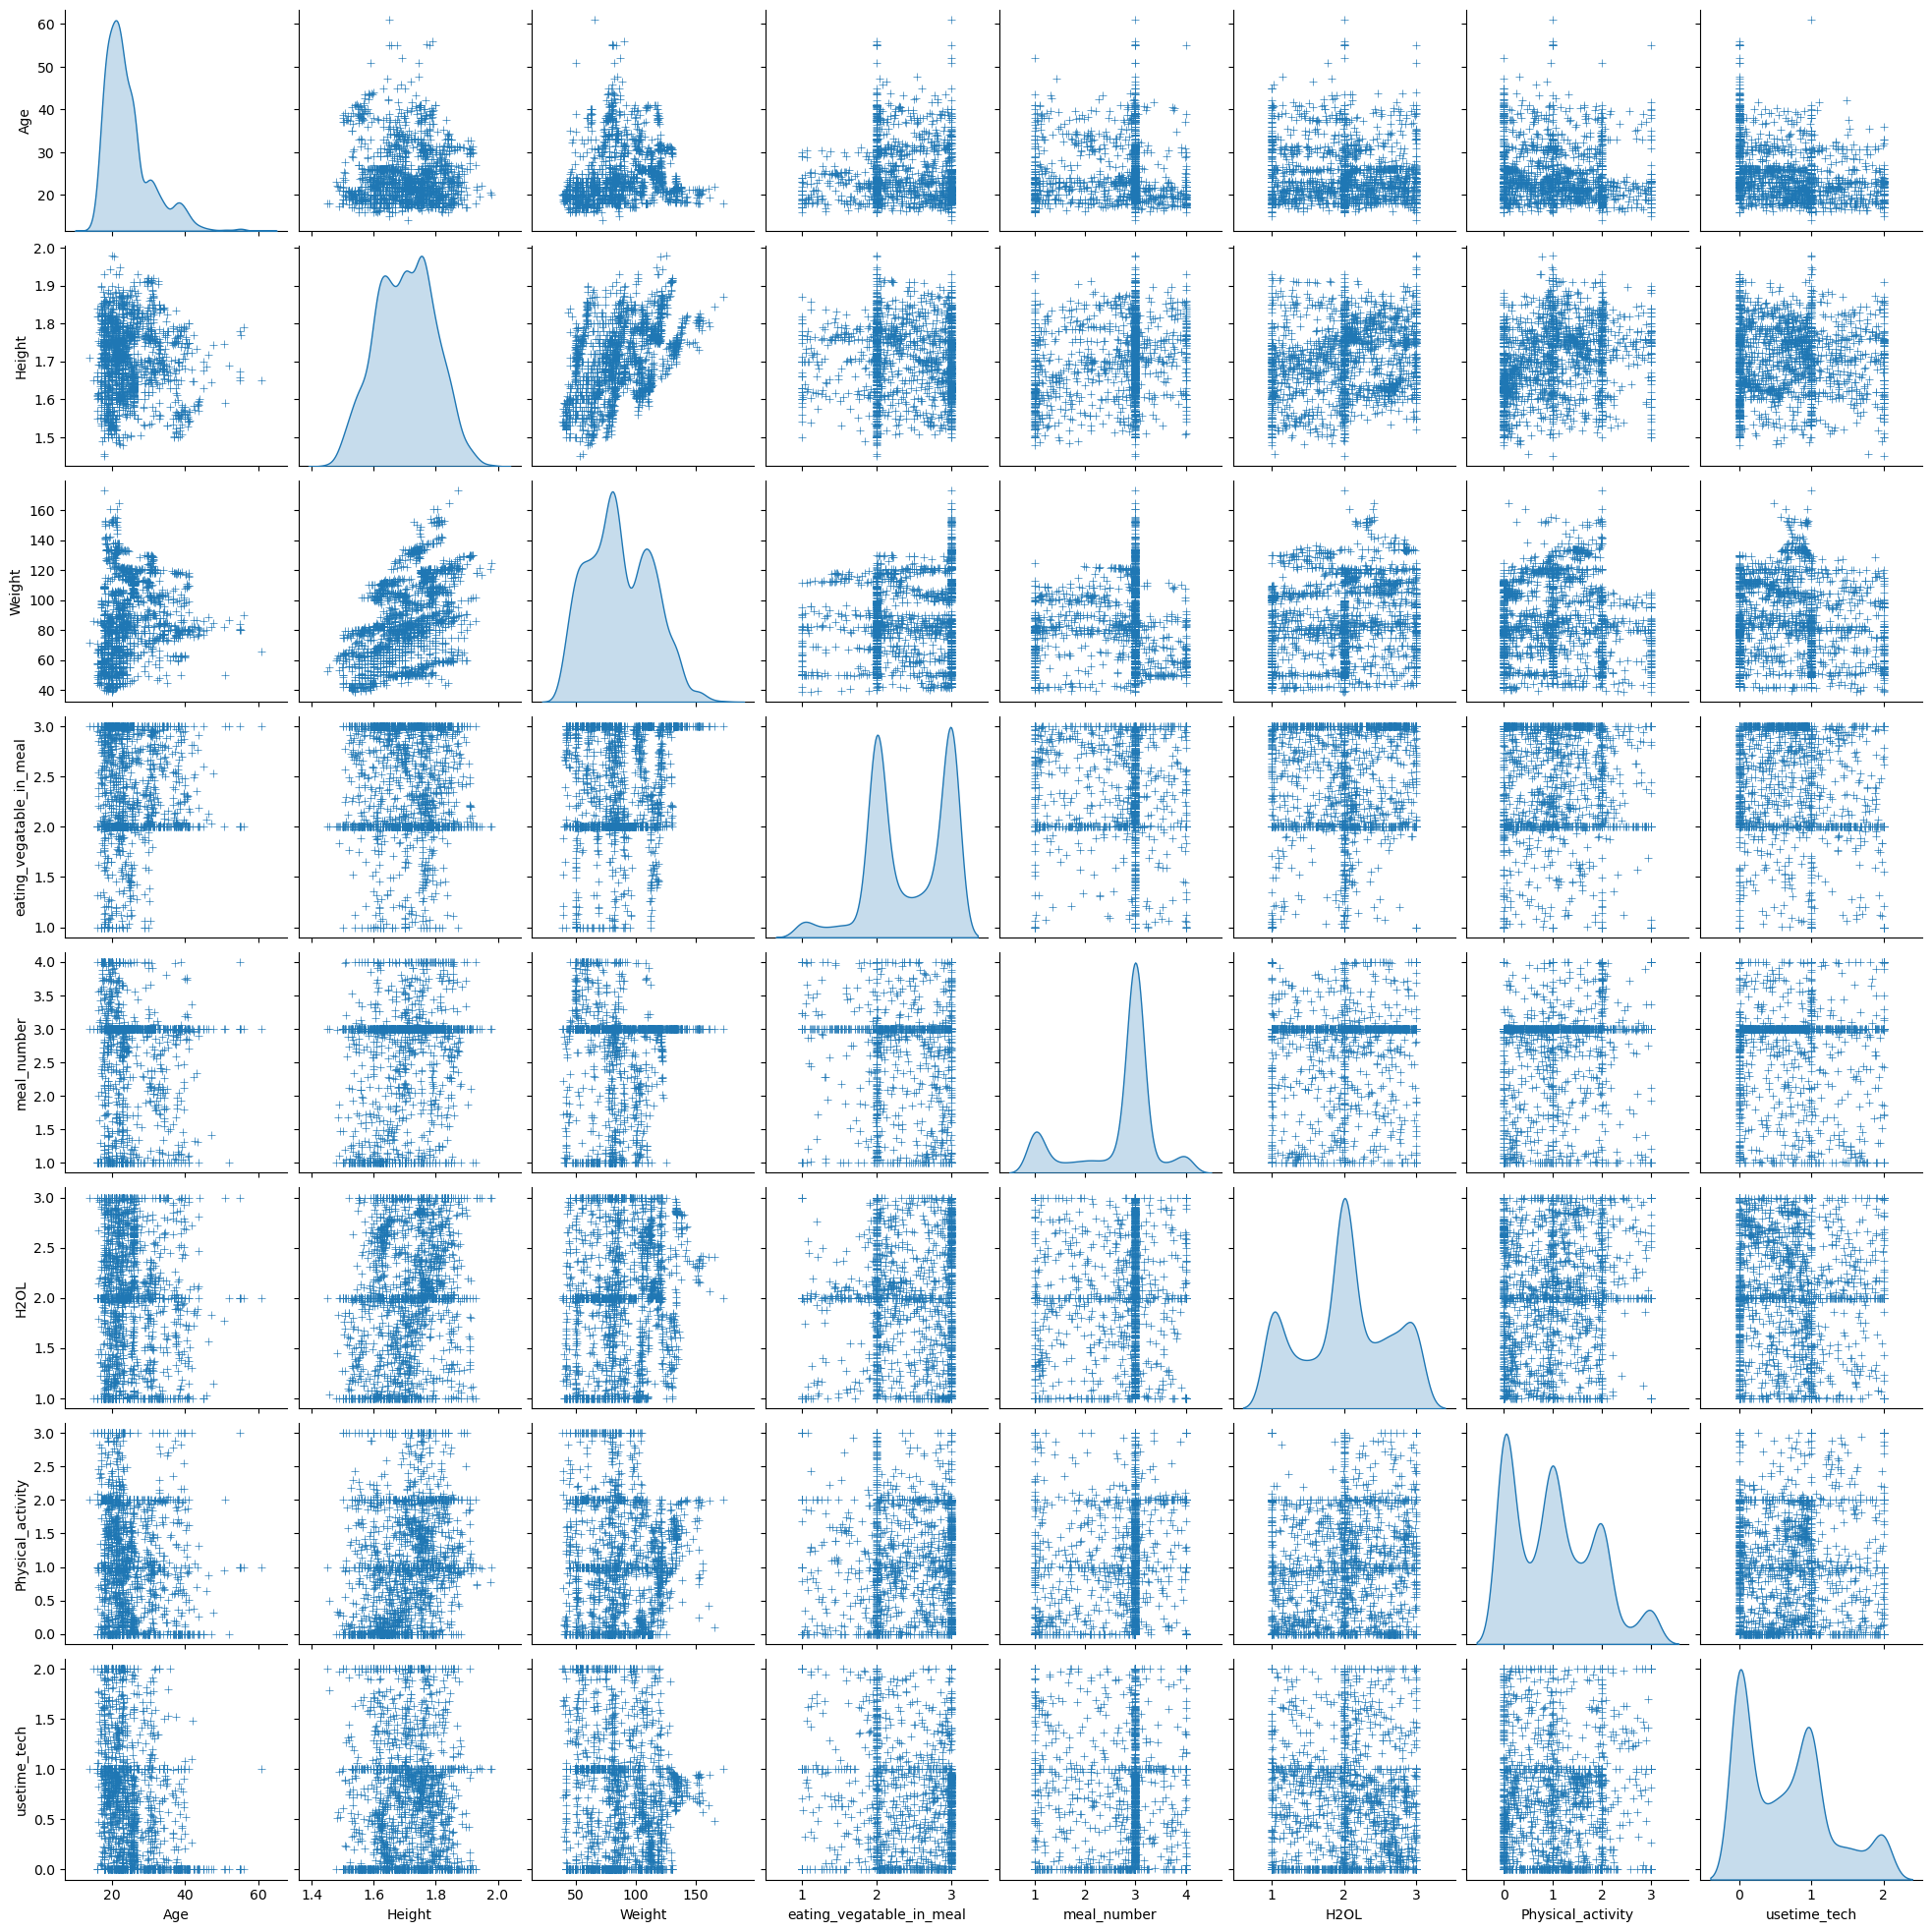

In [13]:
sns.pairplot(data=data,diag_kind='kde',markers='+')

In [11]:
data.head()
data['Alcohol']=data['Alcohol'].astype(str)
data['Transportation']=data['Transportation'].astype(str)
data['eating_between_meal']=data['eating_between_meal'].astype(str)
pd.get_dummies(data)
data

,Gender,Age,Height,Weight,Family_hist_owerweight,eat__high_cal,eating_vegatable_in_meal,meal_number,eating_between_meal,Smoke,H2OL,Monitör_cal,Physical_activity,usetime_tech,Alcohol,Transportation,Obesity_level
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
from sklearn.preprocessing import LabelEncoder


string_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in string_columns:
    data[col] = label_encoder.fit_transform(data[col])

data


,Gender,Age,Height,Weight,Family_hist_owerweight,eat__high_cal,eating_vegatable_in_meal,meal_number,eating_between_meal,Smoke,H2OL,Monitör_cal,Physical_activity,usetime_tech,Alcohol,Transportation,Obesity_level
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


<Axes: >

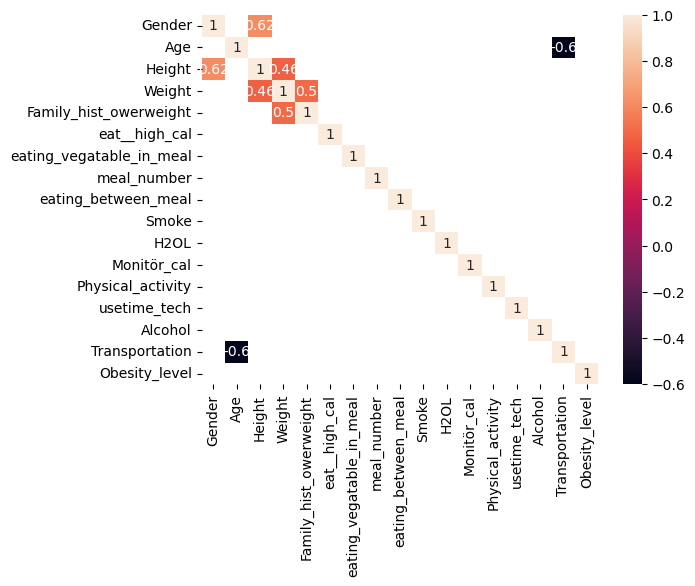

In [13]:
sns.heatmap(data.corr()[(data.corr()>0.4) | (data.corr()<-0.4)],annot=True)

In [14]:
X=data.drop('Obesity_level',axis=1)
y=data.Obesity_level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
score=r2_score(y_test,y_pred)
print(f'Score is of linear regression:{score}')
mse=mean_squared_error(y_test,y_pred)
print(f'Mean squared error is :{mse}')

Score is of linear regression:0.2738671515922113
Mean squared error is :2.7180810319126927


In [16]:
# Import XGBRegressor for regression tasks
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_test_mse = mean_squared_error(y_test, xgb.predict(X_test))
xgb_test_r2 = r2_score(y_test, xgb.predict(X_test))

print('XGBoost Modeli:')
print('Test MSE:', xgb_test_mse)




XGBoost Modeli:
Test MSE: 0.4189757008726578


In [17]:
# Import GradientBoostingRegressor for regression tasks
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)
y_pred_test_gbr = gbr.predict(X_test)

mse_test_gbr = mean_squared_error(y_test, y_pred_test_gbr)
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)


print('Gradient Boosting Regressor Modeli:')
print('Test MSE:', mse_test_gbr)
print('Test R-2 of gradient boost regressor:', r2_test_gbr)

Gradient Boosting Regressor Modeli:
Test MSE: 0.7068008782807909
Test R-2 of gradient boost regressor: 0.8111787952686604


In [18]:
# Import DecisionTreeRegressor for regression tasks

dt_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2)

dt_reg.fit(X_train, y_train)

train_predict_dt = dt_reg.predict(X_train)
test_predict_dt = dt_reg.predict(X_test)

dt_test_r2 = r2_score(y_test, test_predict_dt)
mse_test_dt = mean_squared_error(y_test, test_predict_dt)


print('Decision Tree Regressor Model Accuracy Test:', dt_test_r2 * 100, '%')
print('test mse',mse_test_dt)



Decision Tree Regressor Model Accuracy Test: 81.69432101840887 %
test mse 0.6852233572031308


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(1)  # last layer
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)



test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)
print("\nTest Seti:")
print("MSE:", test_mse)
print("R-squared of  Sequential model:", test_r2)



Epoch 1/100

45/45 [==============================] - 1s 1ms/step - loss: 10.8041
Epoch 2/100
45/45 [==============================] - 0s 864us/step - loss: 4.0848
Epoch 3/100
45/45 [==============================] - 0s 887us/step - loss: 2.8964
Epoch 4/100
45/45 [==============================] - 0s 864us/step - loss: 2.5954
Epoch 5/100
45/45 [==============================] - 0s 864us/step - loss: 2.4196
Epoch 6/100
45/45 [==============================] - 0s 841us/step - loss: 2.2530
Epoch 7/100
45/45 [==============================] - 0s 841us/step - loss: 2.1098
Epoch 8/100
45/45 [==============================] - 0s 841us/step - loss: 1.9501
Epoch 9/100
45/45 [==============================] - 0s 841us/step - loss: 1.7949
Epoch 10/100
45/45 [==============================] - 0s 818us/step - loss: 1.6193
Epoch 11/100
45/45 [==============================] - 0s 841us/step - loss: 1.4682
Epoch 12/100
45/45 [==============================] - 0s 841us/step - loss: 1.2969
Epoch 13/10

In [20]:
rf=RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

#r2 score
mse=mean_squared_error(y_test,y_pred)

r2_rf=r2_score(y_test,y_pred)

print(f"Random forest's Mse is :{mse}")
print(f"Random Forest score is :{r2_rf}")

Random forest's Mse is :0.37966226685796267
Random Forest score is :0.8985735745072572


In [21]:
print(f'Score is of linear regression:{score}')
print('Test R-2 of Xboost:', xgb_test_r2)
print('Test R-2 of gradient boost regressor:', r2_test_gbr)
print("R-squared of  Sequential model:", test_r2)
print(f"Random Forest score is :{r2_rf}")
print('Decision Tree Regressor Model Accuracy Test:', dt_test_r2 * 100, '%')

Score is of linear regression:0.2738671515922113
Test R-2 of Xboost: 0.8880710267588208
Test R-2 of gradient boost regressor: 0.8111787952686604
R-squared of  Sequential model: 0.8157791007997568
Random Forest score is :0.8985735745072572
Decision Tree Regressor Model Accuracy Test: 81.69432101840887 %
